# Structural Estimation

In [119]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
import scipy.optimize as opt
import math
import scipy
import scipy.integrate as integrate
from scipy import stats as sts
from numpy import linalg as la

## Exercise 1

### Part 1

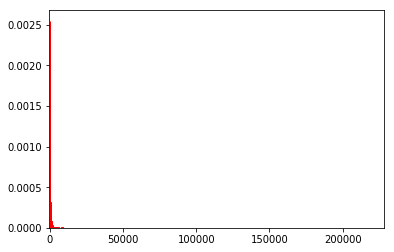

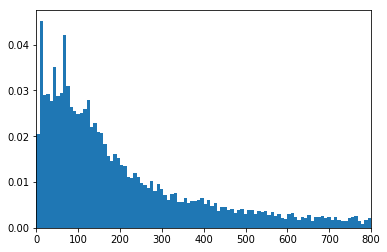

In [104]:
#Import txt file with claim data
claims = np.loadtxt("Data/clms.txt")
# Plot histograms NOTE PERCENT THING IS WRONG MUST CHANGE

weights = (1 / len(claims)) * np.ones_like(claims)

plt.hist(claims, density=True, bins= 1000, weights = weights, edgecolor="red")
plt.xlim(-500, claims.max())
plt.show()

weightslimited = 1/(len(claims[claims<800])) * np.ones_like(claims[claims<800])

plt.hist(claims[claims<800], weights = weightslimited, bins= 100)
plt.xlim(0, 800)
plt.show()
    

The second histogram is preferable to the first one, because the data is actually legible.

### Part b

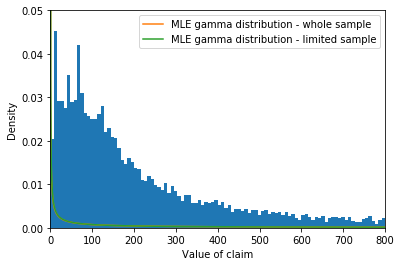

 Whole Sample: 
 alpha =  0.22175531700084541 
 beta =  21911.06469927569 
 Limited Sample: 
 alpha =  0.20348864099178415 
 beta =  21911.064699783838


In [105]:
#define clean part of f.
claimslimited = claims[claims<800]

#Define a function for the gamma distribution
def GApdf(x, alpha, beta):
    pdfval = 1/(beta ** alpha * (math.gamma(alpha)) ) \
             * x ** (alpha- 1) * np.exp(-(x/beta))
    return pdfval

#Define criterion function
def crit1b(params, args):
    '''
    The function to maximize (negative of sum of log-
    likelihoods) for a vector X and parameters alpha, beta
    '''
    X = args
    alpha, beta = params
    #Get log-likelihood
    pdfval = GApdf(X, alpha, beta)
    log_pdf_val = np.log(pdfval)
    sum_log_pdf_val = np.sum(log_pdf_val)
    neg_sum_log_pdf_val = - sum_log_pdf_val
    return neg_sum_log_pdf_val

#Grab initial guess
beta0 = np.var(claims)/np.mean(claims)
alpha0 = np.mean(claims)/beta0
guess = [alpha0, beta0]

#Pull results
bds = ((1e-5, None), (1e-5, None))
results = opt.minimize(crit1b, guess, args = claims, bounds = bds)
limitedresults = opt.minimize(crit1b, guess, args = claimslimited, bounds = bds)
alpha, beta = results.x
GAerr = results.fun
alphalimited, betalimited = limitedresults.x

#define xgrid
xgrid = np.linspace(0.01, 800, 1000)

#put results into plottable grid.
resultsgrid = GApdf(xgrid, alpha, beta)
limitedresultsgrid = GApdf(xgrid, alphalimited, betalimited)

#Plot
plt.hist(claims[claims<800], weights = weightslimited, bins= 100)
plt.plot(xgrid, resultsgrid, label = "MLE gamma distribution - whole sample")
plt.plot(xgrid, limitedresultsgrid, label = "MLE gamma distribution - limited sample")
plt.xlim(0, 800)
plt.ylim(0, .05)
plt.xlabel("Value of claim")
plt.ylabel("Density")
plt.legend()
plt.show()


#Report Results
print(" Whole Sample: \n",
       "alpha = ", alpha, \
       "\n beta = ", beta, \
      "\n Limited Sample: \n",
       "alpha = ", alphalimited, \
       "\n beta = ", betalimited)

Weirdly it doesn't even seem to matter if I limit my sample to only the observations which are less than 800.

### Part c

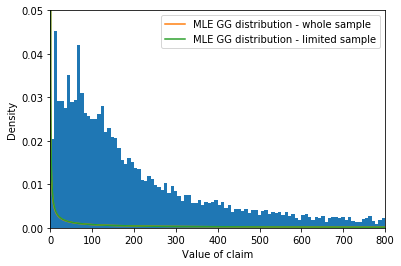

 Whole Sample: 
 alpha =  0.22175388191916012 
 beta =  21911.06437456292 
 m = 0.9977001712681741 
 Limited Sample: 
 alpha =  0.2034851449617037 
 beta =  21911.064638789405 
 m =  0.8868958758893984


In [120]:
#Define a function for the gamma distribution
def GGpdf(x, alpha, beta, m):
    pdfval = m/(beta ** alpha * (math.gamma(alpha/m)) ) \
             * x ** (alpha- 1) * np.exp(-(x/beta)**m)
    return pdfval

#Define criterion function
def crit1c(params, args):
    '''
    The function to maximize (negative of sum of log-
    likelihoods) for a vector X and parameters alpha, beta, m
    '''
    X = args
    alpha, beta, m = params
    #Get log-likelihood
    pdfval = GGpdf(X, alpha, beta, m)
    log_pdf_val = np.log(pdfval)
    sum_log_pdf_val = np.sum(log_pdf_val)
    neg_sum_log_pdf_val = - sum_log_pdf_val
    return neg_sum_log_pdf_val

#Grab initial guess
beta0 = np.var(claims)/np.mean(claims)
alpha0 = np.mean(claims)/beta0
m0 = 1
guess = [alpha0, beta0, m0]

#Pull results
bds = ((1e-5, None), (1e-5, None), (1e-5, None))
results = opt.minimize(crit1c, guess, args = claims, bounds = bds)
limitedresults = opt.minimize(crit1c, guess, args = claimslimited, bounds = bds)
alpha, beta, m = results.x
GGerr = results.fun
alphalimited, betalimited, mlimited = limitedresults.x

#define xgrid
xgrid = np.linspace(0.01, 800, 1000)

#put results into plottable grid.
resultsgrid = GGpdf(xgrid, alpha, beta, m)
limitedresultsgrid = GGpdf(xgrid, alphalimited, betalimited, mlimited)

#Plot
plt.hist(claims[claims<800], weights = weightslimited, bins= 100)
plt.plot(xgrid, resultsgrid, label = "MLE GG distribution - whole sample")
plt.plot(xgrid, limitedresultsgrid, label = "MLE GG distribution - limited sample")
plt.xlim(0, 800)
plt.ylim(0, .05)
plt.xlabel("Value of claim")
plt.ylabel("Density")
plt.legend()
plt.show()


#Report Results
print(" Whole Sample: \n",
       "alpha = ", alpha, \
       "\n beta = ", beta, \
       "\n m =", m, \
      "\n Limited Sample: \n",
       "alpha = ", alphalimited, \
       "\n beta = ", betalimited, \
       "\n m = ", mlimited)


### Part (d)

C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in power
  import sys
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


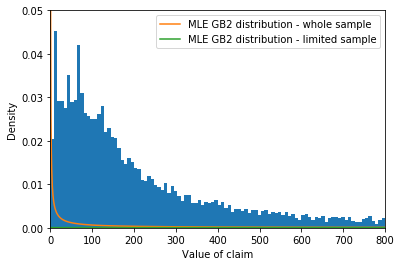

 Whole Sample: 
 alpha =  0.10777348960309872 
 beta =  21911.07099898858 
 p = 61.2760261154972 
 q = 102.1584824409633 
 Limited Sample: 
 alpha =  0.9787247608992424 
 beta =  21911.05377033113 
 p = 1.1884189025004108 
 q = 120.13896050042712


74861.36252172642

In [139]:
#define clean part of f.
claimslimited = claims[claims<800]

#Define a function for the gamma distribution
def GB2pdf(x, alpha, beta, p, q):
    pdfval = alpha*x**(alpha*p-1) / (beta**(alpha*p)
             *scipy.special.beta(p, q)*(1+(x/beta)**alpha)**(p+q))
    return pdfval

#Define criterion function
def crit1d(params, args):
    '''
    The function to maximize (negative of sum of log-
    likelihoods) for a vector X and parameters alpha, beta, p, q
    '''
    X = args
    alpha, beta, p, q = params
    #Get log-likelihood
    pdfval = GB2pdf(X, alpha, beta, p, q)
    log_pdf_val = np.log(pdfval)
    sum_log_pdf_val = np.sum(log_pdf_val)
    neg_sum_log_pdf_val = - sum_log_pdf_val
    return neg_sum_log_pdf_val

#Grab initial guess
beta0 = np.var(claims)/np.mean(claims)
alpha0 = np.mean(claims)/beta0
p0 = 1
q0 = 1

guess = [alpha0, beta0, p0, q0]

#Pull results
bds = ((1e-5, None), (1e-5, None), (1e-5, None), (1e-5, None))
results = opt.minimize(crit1d, guess, args = claims, bounds = bds)
limitedresults = opt.minimize(crit1d, guess, args = claimslimited, bounds = bds)
alpha, beta, p ,q = results.x
GB2err = crit1d([alpha, beta, p, q], claims)
alphalimited, betalimited, plimited, qlimited = limitedresults.x

#define xgrid
xgrid = np.linspace(0.01, 800, 1000)

#put results into plottable grid.
resultsgrid = GApdf(xgrid, alpha, beta)
limitedresultsgrid = GApdf(xgrid, alphalimited, betalimited)

#Plot
plt.hist(claims[claims<800], weights = weightslimited, bins= 100)
plt.plot(xgrid, resultsgrid, label = "MLE GB2 distribution - whole sample")
plt.plot(xgrid, limitedresultsgrid, label = "MLE GB2 distribution - limited sample")
plt.xlim(0, 800)
plt.ylim(0, .05)
plt.xlabel("Value of claim")
plt.ylabel("Density")
plt.legend()
plt.show()

#Report Results
print(" Whole Sample: \n",
       "alpha = ", alpha, \
       "\n beta = ", beta, \
       "\n p =", p, \
       "\n q =", q, \
       "\n Limited Sample: \n",
       "alpha = ", alphalimited, \
       "\n beta = ", betalimited,
       "\n p =", plimited, \
       "\n q =", qlimited )
GB2err

Something very different now happened when I limited the sample... I'll stick to only looking at the whole sample estimates from now on.

### part (e)

In [140]:
# Two likelihood ratio tests
LRGA = 2 * (np.log(GB2err) - np.log(GAerr))
LRGG = 2 * (np.log(GB2err) - np.log(GGerr))

pGA = chi2.cdf(LRGA, df=4) 
pGG = chi2.cdf(LRGG, df=4)
print("Chi squared test for GG:", pGG, "Chi squared test for GA:", pGA)
print("Which makes sense cause the distributions visibly \
look nothing like each other.")

Chi squared test for GG: 0.0 Chi squared test for GA: 0.0
Which makes sense cause the distributions visibly look nothing like each other.



### part (f)

## Exercise 2

In [141]:
#Readin
data = pd.read_csv("Data/MacroSeries.txt", header = None)
data.columns = ['c','k','w','r','y']

### Part (a)

I went to war with this one for hours, but I couldn't get my algorithm to converge, so I just used Tim's code.

In [142]:
macdata = pd.read_csv('Data/MacroSeries.txt', header=None)
macdata.columns = ['ct', 'kt', 'wt', 'rt', 'yt']

In [143]:
def get_z(w, k, alpha): 
    '''Get me a series of z's for some series of k and w and a parameter alpha'''
    zt = np.log(w/((1-alpha)*k**alpha))
    return zt
    
def log_lik_BM_1(w, k, alpha, mu, sigma, rho):
    '''Get me the log likelihood of the z values pdf for some data and params'''
    zvals = get_z(w, k, alpha)
    log_lik_val = 0
    for i in range(len(zvals)):
        if i == 0:
            pdf_val = norm.pdf(mu, loc=mu, scale=sigma)
        else:
            pdf_val = norm.pdf(zvals[i], loc=(rho*zvals[i-1] + (1-rho)*mu), scale=sigma)
        ln_pdf_val = np.log(pdf_val)
        log_lik_val += ln_pdf_val
    return log_lik_val

def crit_BM_1(params, *args):
    '''Define a criterion function to minimise
    in this case the negative of the log likelihood'''
    alpha, mu, sigma, rho = params
    w, k = args
    log_lik_val = log_lik_BM_1(w, k, alpha, mu, sigma, rho)
    neg_log_lik_val = -log_lik_val
    return -log_lik_val

In [144]:
params_init_BM_1 = np.array([0.4, 0.4, 0.4, 0.8])
mle_BM_args = (macdata.wt, macdata.kt)
results_BM_1 = opt.minimize(crit_BM_1, params_init_BM_1, args=mle_BM_args, method ='L-BFGS-B', bounds=((1e-2, 0.99),\
                                                                                                       (1e-2, None),\
                                                                                                (1e-2, None),\
                                                                                                      (-0.99, 0.99)))
alpha_mle, mu_mle, sigma_mle, rho_mle = results_BM_1.x
loglikval_BM = -results_BM_1.fun
IHVCV = results_BM_1.hess_inv.todense()
#Use rick's algorithm to take negative elements of off-diagonal
print('alpha_mle=', alpha_mle, '\n mu_mle=', mu_mle, '\n sigma_mle:', sigma_mle, '\n rho_mle:', rho_mle, '\n Loglikvalmax=', loglikval_BM, "\n InvHessVarCovar = \n", IHVCV)

alpha_mle= 0.5533950092374852 
 mu_mle= 8.106670099451671 
 sigma_mle: 0.09278028683172274 
 rho_mle: 0.8246557936631542 
 Loglikvalmax= 95.85827569024597 
 InvHessVarCovar = 
 [[ 1.25357145e+01 -1.65355146e+02 -5.03866066e-01 -1.89586233e+00]
 [-1.65355146e+02  2.18117299e+03  6.64523201e+00  2.50675225e+01]
 [-5.03866066e-01  6.64523201e+00  2.03966052e-02  7.20571123e-02]
 [-1.89586233e+00  2.50675225e+01  7.20571123e-02  5.19281931e-01]]


### Part (b)

In [145]:
def get_z_2(r, k, alpha): 
    '''Get me a series of z's for some series of k and r and a parameter alpha'''
    zt = np.log(r/((alpha)*k**(alpha-1)))
    return zt
    
def log_lik_BM_2(r, k, alpha, mu, sigma, rho):
    '''Get me the log likelihood of the z values pdf for some data and params'''
    zvals = get_z_2(r, k, alpha)
    log_lik_val = 0
    for i in range(len(zvals)):
        if i == 0:
            pdf_val = norm.pdf(mu, loc=mu, scale=sigma)
        else:
            pdf_val = norm.pdf(zvals[i], loc=(rho*zvals[i-1] + (1-rho)*mu), scale=sigma)
        ln_pdf_val = np.log(pdf_val)
        log_lik_val += ln_pdf_val
    return log_lik_val

def crit_BM_2(params, *args):
    '''Define a criterion function to minimise
    in this case the negative of the log likelihood'''
    alpha, mu, sigma, rho = params
    r, k = args
    log_lik_val = log_lik_BM_2(r, k, alpha, mu, sigma, rho)
    neg_log_lik_val = -log_lik_val
    return -log_lik_val


In [146]:
params_init_BM_2 = np.array([0.4, 0.4, 0.4, 0.8])
mle_BM_args = (macdata.rt, macdata.kt)
results_BM_2 = opt.minimize(crit_BM_2, params_init_BM_2, args=mle_BM_args, method ='L-BFGS-B', bounds=((1e-2, 0.99),\
                                                                                                       (1e-2, None),\
                                                                                                (1e-2, None),\
                                                                                                      (-0.99, 0.99)))
alpha_mle, mu_mle, sigma_mle, rho_mle = results_BM_2.x
loglikval_BM = -results_BM_2.fun
IHVCV = -results_BM_2.hess_inv.todense()
#print(results_BM_2)
print('alpha_mle=', alpha_mle, '\n mu_mle=', mu_mle, '\n sigma_mle:', sigma_mle, '\n rho_mle:', rho_mle, '\n Loglikvalmax=', loglikval_BM, "\n InvHessVarCovar = \n", IHVCV)

alpha_mle= 0.553340406136769 
 mu_mle= 7.570429565482019 
 sigma_mle: 0.09278247677902113 
 rho_mle: 0.8246543401866663 
 Loglikvalmax= 95.85827530681503 
 InvHessVarCovar = 
 [[-1.12980211e+01  1.88462796e+02 -6.75337000e-01  6.34534111e+00]
 [ 1.88462796e+02 -3.14933614e+03  9.79680551e+00 -1.00129641e+02]
 [-6.75337000e-01  9.79680551e+00 -4.27523164e-01  1.88726805e+00]
 [ 6.34534111e+00 -1.00129641e+02  1.88726805e+00 -9.44329792e+00]]


### Part (c)

In [147]:
#get estimates from part a 
params_init_BM_1 = np.array([0.4, 0.4, 0.4, 0.8])
mle_BM_args = (macdata.wt, macdata.kt)
results_BM_1 = opt.minimize(crit_BM_1, params_init_BM_1, args=mle_BM_args, method ='L-BFGS-B', bounds=((1e-2, 0.99),\
                                                                                                       (1e-2, None),\
                                                                                                (1e-2, None),\
                                                                                                      (-0.99, 0.99)))
params = results_BM_1.x
print(params)

[0.55339501 8.1066701  0.09278029 0.82465579]


In [148]:
# I will define a more general function.
def intgreaterthan(r, k, ztm1, params):
    '''
    This function gives the probability that the interest
    rate is greater than r given inputs k, ztm1, the capital
    in the current period and shock from last period
    '''
    alpha, mu, sigma, rho = params
    #get z_t such that r is the interest rate
    impliedz = get_z_2(r, k, alpha)
    #find probability tht z_t > impliedz
    cdf = norm.cdf(impliedz, (rho * ztm1 + (1 - rho) * mu), sigma)
    prob = 1 - cdf
    return prob

print("Probaility that interest rate > 1 is:", intgreaterthan(1, 7500000, 10, params))

Probaility that interest rate > 1 is: 1.0


# GMM

## Problem 3

Note: It's probably bad practice, but I re-used function names so you must make sure to run the code from this problem in order.

### Part (a)

Text(0.5,1,'Income distribution in U.S')

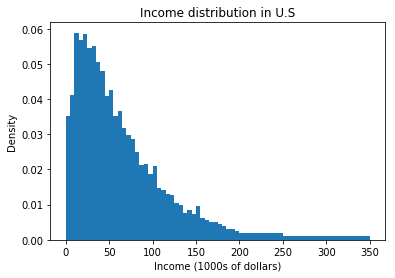

In [149]:
data = pd.read_table("Data/usincmoms.txt", header = None)
data.columns = ["Percent", "Midpoint"]
#scale midpoints to be in 1000s
data.Midpoint = data.Midpoint/1000

#grab weights
wts = data.Percent.copy()

#Fix weights at tail
wts[41] = wts[41]/20
wts[40] = wts[40]/10

#plot
bins = np.append(np.linspace(0, 200, 41), [250, 350])

plt.hist(data.Midpoint, bins = bins, weights=wts)
plt.xlabel("Income (1000s of dollars)")
plt.ylabel("Density")
plt.title("Income distribution in U.S")

In [150]:
#Define Log-normal pdf 
def lognormpdf(x, mu, sigma):
    '''
    lognorm pdf. x >= 0, sigma > 0, mu is any number
    '''
    out = (1 / (x * sigma * np.sqrt(2 * np.pi))) * \
    np.exp(- ((np.log(x) - mu)**2 / (2 * sigma**2)))
    return out

#Define the model moments
def model_moments(mu, sigma):
    '''
    Function computes 42 model moments for generalized 
    method of moments.
    
    Uses method of quadrature to estimate the integrals for
    quantile moments of the lognormal pdf.
    
    Requires you to have a well-defined "bins."
    '''
    N = len(bins)
    moms_mod = np.zeros(N-1)
    for i in range(N-1):
        moms_mod[i] = integrate.quad(lambda x: lognormpdf(x, mu, sigma), bins[i], bins[i+1])[0]
    return moms_mod 

#Define an error function
def err_vec(data, mu, sigma, simple=False):
    '''
    Function computes the vector of moment errors for GMM
    Fits a log-normal distribution.
    
    if simple is true errors are simple difference, if false they
    are perent deviation.
    '''
    moms_data = np.array(data.Percent)
    moms_mod = model_moments(mu, sigma)
    if simple:
        err_vec = moms_mod - moms_data
    else:
        err_vec = (moms_mod - moms_data) / moms_data
    return err_vec

def criterion(params, args):
    '''
    Define criterion function using the L2-norm (sum of squared 
    errors) using given parameters.
    '''
    mu, sigma = params
    data, W = args
    err = err_vec(data, mu, sigma, simple=False)
    crit_val = err.T @ W @ err
    return crit_val


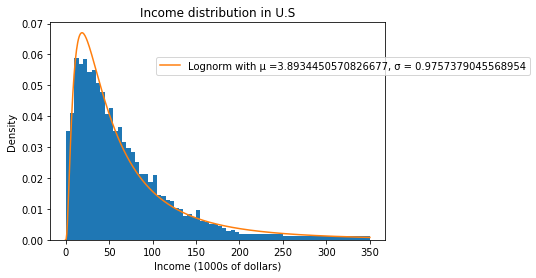

In [157]:
#Perform GMM estimation

#Inital guesses for params
#mean initial guess is log of average mean
mu_guess = np.log(np.sum(data.Percent * data.Midpoint))
#arbitrary sigma initial guess
sig_guess = 1.1
params_init=np.array([mu_guess, sig_guess])

# Define weighting Matrix
W = np.diag(data.Percent)
gmm_args = np.array([data, W])

results = opt.minimize(criterion, params_init, args=gmm_args,  method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
#criterion(params_init, gmm_args)
mu_GMM, sig_GMM = results.x

#print("Error vec", err_vec(data, mu_GMM, sig_GMM))
#print("Model moments", np.sum(model_moments(5, 1)))
#print("Data moments:", np.array(data.Percent))

xgrid = np.linspace(1e-9, 350, 500)
plt.hist(data.Midpoint, bins = bins, weights=wts)
plt.xlabel("Income (1000s of dollars)")
plt.ylabel("Density")
plt.title("Income distribution in U.S")
#Multiply distribution by 5 to account for fact that bins are of width 5
plt.plot(xgrid, 5*lognormpdf(xgrid, mu_GMM, sig_GMM), label = f"Lognorm with μ ={mu_GMM}, σ = {sig_GMM}")
plt.legend(loc='center left', bbox_to_anchor=(.3, 0.8))
error_LN = results.fun

Looks good!

### Part (c)

In [96]:
#Define a function for the gamma distribution
def GApdf(x, alpha, beta):
    pdfval = 1/(beta ** alpha * (math.gamma(alpha))) \
             * x ** (alpha- 1) * np.exp(-(x/beta))
    return pdfval

#Implement method from previous problem - define functions:
#Define model_moments
def model_moments(alpha, beta):
    '''
    Function computes 42 model moments for generalized 
    method of moments.
    
    Uses method of quadrature to estimate the integrals for
    quantile moments of the lognormal pdf.
    
    Requires you to have a well-defined "bins."
    '''
    N = len(bins)
    moms_mod = np.zeros(N-1)
    for i in range(N-1):
        moms_mod[i] = integrate.quad(lambda x: GApdf(x, alpha, beta), bins[i], bins[i+1])[0]
    return moms_mod 

#Define an error function
def err_vec(data, alpha, beta, simple=False):
    '''
    Function computes the vector of moment errors for GMM
    Fits a log-normal distribution.
    
    if simple is true errors are simple difference, if false they
    are perent deviation.
    '''
    moms_data = np.array(data.Percent)
    moms_mod = model_moments(alpha, beta)
    if simple:
        err_vec = moms_mod - moms_data
    else:
        err_vec = (moms_mod - moms_data) / moms_data
    return err_vec

def criterion(params, args):
    '''
    Define criterion function using the L2-norm (sum of squared 
    errors) using given parameters.
    '''
    alpha, beta = params
    data, W = args
    err = err_vec(data, alpha, beta, simple=False)
    crit_val = err.T @ W @ err
    return crit_val


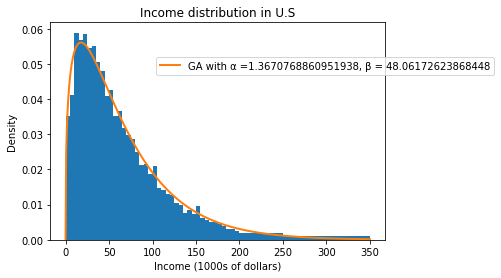

In [172]:
#Perform GMM estimation

#Inital guesses for params
#mean initial guess is log of average mean
alpha_guess = 3
#arbitrary sigma initial guess
beta_guess = 20
params_init=np.array([alpha_guess, beta_guess])

# Define weighting Matrix
W = np.diag(data.Percent)
gmm_args = np.array([data, W])

results = opt.minimize(criterion, params_init,  method='L-BFGS-B', args=gmm_args, bounds=((1e-10, None), (1e-10, None)))
#criterion(params_init, gmm_args)
alpha_GMM, beta_GMM = results.x

#print("Error vec", err_vec(data, mu_GMM, sig_GMM))
#print("Model moments", model_moments(5, 1))
#print("Data moments:", np.array(data.Percent))


xgrid = np.linspace(1e-9, 350, 500)
plt.hist(data.Midpoint, bins = bins, weights=wts)
plt.xlabel("Income (1000s of dollars)")
plt.ylabel("Density")
plt.title("Income distribution in U.S")
plt.plot(xgrid, 5*GApdf(xgrid, alpha_GMM, beta_GMM), label = f"GA with α ={alpha_GMM}, β = {beta_GMM}", linewidth = 2)
plt.legend(loc='center left', bbox_to_anchor=(.3, 0.8), prop = {'size': 10})
error_GA = results.fun

### Part (d)

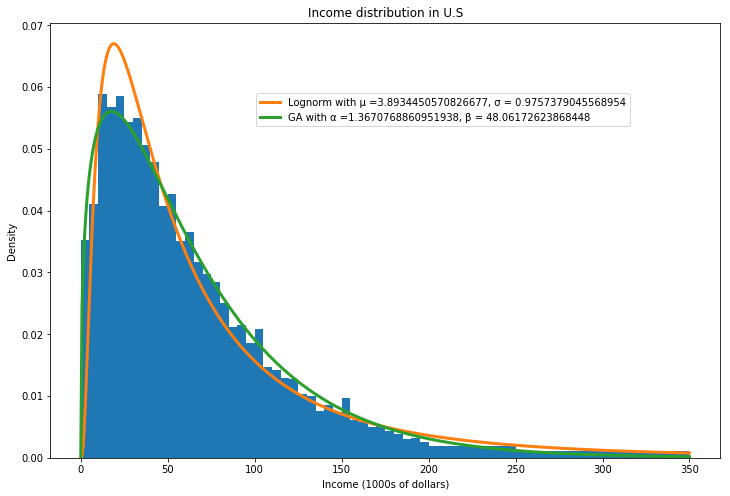

Error for GA: 0.014084919481775995 
 Error for LN: 0.03551648133430143


In [173]:
fig, ax = plt.subplots(figsize = (12, 8))
xgrid = np.linspace(1e-9, 350, 500)
plt.hist(data.Midpoint, bins = bins, weights=wts)
plt.xlabel("Income (1000s of dollars)")
plt.ylabel("Density")
plt.title("Income distribution in U.S")
plt.plot(xgrid, 5*lognormpdf(xgrid, mu_GMM, sig_GMM), label = f"Lognorm with μ ={mu_GMM}, σ = {sig_GMM}", linewidth = 3)
plt.plot(xgrid, 5*GApdf(xgrid, alpha_GMM, beta_GMM), label = f"GA with α ={alpha_GMM}, β = {beta_GMM}", linewidth = 3)
plt.legend(loc='center left', bbox_to_anchor=(.3, 0.8), prop = {'size': 10})
plt.show()

#I grabbed the errors from the objective function in the earlier parts, and I print them here
print("Error for GA:", error_GA, "\n Error for LN:", error_LN)

Gamma distribution looks nicer to me.

### Part (e)

In [166]:
#Re-use crit function et al from part (c). Now we must re-define W.
err1 = err_vec(data, alpha_GMM, beta_GMM)
VCV2 = np.outer(err1, err1.T)
VCV2 = VCV2 / VCV2.shape[0]
W_new = la.pinv(VCV2)

#print(W_new)
#Re-define the procedure.
#Define model_moments
def model_moments(alpha, beta):
    '''
    Function computes 42 model moments for generalized 
    method of moments.
    
    Uses method of quadrature to estimate the integrals for
    quantile moments of the lognormal pdf.
    
    Requires you to have a well-defined "bins."
    '''
    N = len(bins)
    moms_mod = np.zeros(N-1)
    for i in range(N-1):
        moms_mod[i] = integrate.quad(lambda x: GApdf(x, alpha, beta), bins[i], bins[i+1])[0]
    return moms_mod 

#Define an error function
def err_vec(data, alpha, beta, simple=False):
    '''
    Function computes the vector of moment errors for GMM
    Fits a log-normal distribution.
    
    if simple is true errors are simple difference, if false they
    are perent deviation.
    '''
    moms_data = np.array(data.Percent)
    moms_mod = model_moments(alpha, beta)
    if simple:
        err_vec = moms_mod - moms_data
    else:
        err_vec = (moms_mod - moms_data) / moms_data
    return err_vec

def criterion(params, args):
    '''
    Define criterion function using the L2-norm (sum of squared 
    errors) using given parameters.
    '''
    alpha, beta = params
    data, W = args
    err = err_vec(data, alpha, beta, simple=False)
    crit_val = err.T @ W @ err
    return crit_val

C:\Users\mattd\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


      fun: 1.1858683276836614e-14
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.99797966e-07,  5.94443659e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 21
      nit: 6
   status: 0
  success: True
        x: array([ 3.11131083, 15.08970412])

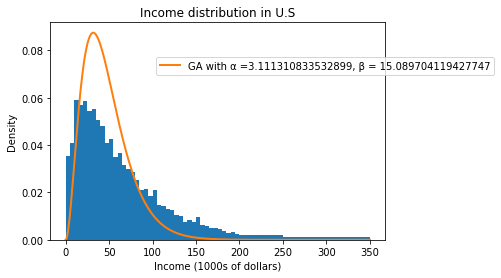

In [167]:
alpha_guess = 2
beta_guess = 15

params_init=np.array([alpha_guess, beta_guess])

# Define weighting Matrix
W = VCV2
#W = np.diag(data.Percent)
gmm_args = np.array([data, W])

results = opt.minimize(criterion, params_init, args=gmm_args, bounds=((1e-10, None), (1e-10, None)))
#criterion(params_init, gmm_args)
alpha_GMM, beta_GMM = results.x


xgrid = np.linspace(1e-9, 350, 500)
plt.hist(data.Midpoint, bins = bins, weights=wts)
plt.xlabel("Income (1000s of dollars)")
plt.ylabel("Density")
plt.title("Income distribution in U.S")
plt.plot(xgrid, 5*GApdf(xgrid, alpha_GMM, beta_GMM), label = f"GA with α ={alpha_GMM}, β = {beta_GMM}", linewidth = 2)
plt.legend(loc='center left', bbox_to_anchor=(.3, 0.8), prop = {'size': 10})
error_GA = results.fun

results

I get an estimate whose error is smaller than the previous error... BUT this estimate is highly sensitive to the initial guess, while the other is not, and therefore I do not trust this distribution at all.

## Problem 4

### Part (a)

In [2]:
#Load in Data
data = pd.read_csv('Data/MacroSeries.txt', header=None)
data.columns = ['ct', 'kt', 'wt', 'rt', 'yt']

In [68]:

#Define function to get series of shocks
def get_z(w, k, alpha): 
    '''Get me a series of z's for some series of k and w and a parameter alpha'''
    zt = np.log(w/((1-alpha)*k**alpha))
    return zt

#Define functions which return each moment condition
def moment1(ztp1, zt, rho, mu):
    out = ztp1 - rho * zt - (1 - rho) * mu
    return out

def moment2(ztp1, zt, rho, mu):
    out = (ztp1 - rho * zt - (1 - rho) * mu) * zt
    return out

def moment3(ztp1, beta, alpha, ktp1, ct, ctp1):
    out = beta * alpha * np.exp(ztp1) * ktp1 ** (alpha - 1) * (ct / ctp1) - 1
    return out
    
def moment4(ztp1, beta, alpha, ktp1, ct, ctp1, wt):
    out = (beta * alpha * np.exp(ztp1) * ktp1 ** (alpha - 1) * (ct / ctp1) - 1) * wt
    return out

#Define func which constructs the moment vector
def datamoments(params, data):
    '''
    Input is a parameters vector and raw data. This function 
    calls the earlier functions to create the series of length-4
    moment vectors whose norm we aim to minimize.
    '''
    #Get series length
    N = len(data.wt)
    #Initialize variables/vectors
    alpha, beta, rho, mu = params
    zt = get_z(data.wt, data.kt, alpha)[1:]
    ztp1 = get_z(data.wt, data.kt, alpha)[:-1]
    kt = data.kt[1:]
    ktp1 = data.kt[:-1]
    wt = data.wt[1:]
    ct = data.ct[1:]
    ctp1 = data.ct[:-1]
    mommat = np.zeros((N, 4))
    #print("LOOK HERE HELLO", moment1(zt, ztp1, rho, mu))
    #Construct moment vectors
    moms1 = moment1(ztp1, zt, rho, mu)
    moms2 = moment2(ztp1, zt, rho, mu)
    moms3 = moment3(ztp1, beta, alpha, ktp1, ct, ctp1)
    moms4 = moment4(ztp1, beta, alpha, ktp1, ct, ctp1, wt)
    momvec = np.array([np.mean(moms1), np.mean(moms2), np.mean(moms3), np.mean(moms4)])
    return momvec

#Define criterion function
def criterion(params, args):
    '''
    Takes parameters alpha, beta, mu, rho and arguments data = the
    raw data and W = a 4 by 4 weighting matrix and defines a criterion
    function which gives the weighted least squares error.
    
    I construct the error vector in this function as well - it's just 
    the norms of the data moments since the model moments are zero.
    '''
    data, W = args
    err_vec = datamoments(params, data)
    err_sum = err_vec.T @ W @ err_vec
    return err_sum

In [78]:
#Params_guess
alpha = .6
beta = .96
mu = 20
rho = .9
params_guess = (alpha, beta, mu, rho)
W = np.eye(4)
print(W)
args = [data, W]

#criterion(params_guess, [data, W])
#datamoments(params_guess, data)

#minimize the criterion function
results = opt.minimize(criterion, params_guess, args=args, method = 'L-BFGS-B', bounds=((1e-10, 1), (1e-10, 1), (1e-10, None), (-1, 1)))
results

#criterion([.417, .993, 8, .50], [data, W])

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


      fun: 45.76522214165433
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.83415359e+08, -2.00674702e+08, -1.20087057e+02, -2.61322697e-01])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 3090
      nit: 396
   status: 0
  success: True
        x: array([0.53905816, 0.60866915, 0.98406235, 1.        ])

100